# 21회 모의고사 
<br>

##  2. 통계분석 (50점) 


<br>
2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 ) <br>
2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br>
2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>
    - alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br> 
2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
    - alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.unicode_minus'] = False

import mglearn
X,y = mglearn.datasets.load_extended_boston()

## 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br>

sklearn의 LinearRegression을 통해 선형회귀모델을 만들고 20% test데이터셋으로 모델을 검증하였다.

모델의 정확도는 약 61.5%이며, RMSE 값은 약 5.6 이었다. 이는 모델이 예측할 때 실제 값과의 차이가 약 5.6정도 난다는 의미이다. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [6]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

print(f'LinearRegression\'s R-squared : {model_lr.score(X_test, y_test)}')
print(f'LinearRegression\'s RMSE : {np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test)))}')

LinearRegression's R-squared : 0.8038912774539622
LinearRegression's RMSE : 4.101911929352885


## 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>

우선, GridSearchCV 함수를 활용하여 alpha를 0.1부터 1까지 적용시켜 최적의 모델을 찾아냈다. 

최적의 모델을 갖는 alpha 값은 0.1이었다. 

alpha값을 조정하여 모델의 학습 정도를 조절할 수 있으며 평가지표로는 R2와 RMSE가 사용된다. 

alpha=1의 모델로 test 데이터를 예측하여 검증해본 결과 R2는 약 0.735, RMSE는 약 4.6으로 나타났다. 

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_rg = {'alpha':np.arange(0,1.1,0.1)}

gcv = GridSearchCV(Ridge(), param_grid=grid_rg)
gcv.fit(X_train, y_train)

print(f'Ridge\'s best score : {gcv.score(X_test, y_test):.3f}')
print(f'Ridge\'s RMSE : {np.sqrt(mean_squared_error(y_test, gcv.predict(X_test)))}')
print(f'Ridge\'s best param : {gcv.best_params_}')


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.29066e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.31037e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.8343e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.28484e-18): result may not be accurate.
  return linalg.solve(A, X

Ridge's best score : 0.756
Ridge's RMSE : 4.578064263602188
Ridge's best param : {'alpha': 0.1}


## 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>

In [8]:
from sklearn.linear_model import Lasso

grid_lss = {'alpha':np.arange(.0, 1.1, 0.1)}

gcv_lss = GridSearchCV(Lasso(), grid_lss)
gcv_lss.fit(X_train, y_train)

print(f'Lasso best params : {gcv_lss.best_params_}')
print(f'Lasso R-squared : {gcv_lss.best_estimator_.score(X_test, y_test)}')
print(f'Lasso RMSE : {np.sqrt(mean_squared_error(y_test, gcv_lss.best_estimator_.predict(X_test)))}')

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.714e+02, tolerance: 2.690e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in 

Lasso best params : {'alpha': 0.0}
Lasso R-squared : 0.7986199784828796
Lasso RMSE : 4.156674983079481


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+03, tolerance: 3.393e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


# 21회 기출분석 (4) 

2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. <br>


In [114]:
m = 100
X_train = 6 * np.random.rand(m, 1) - 3
y_train = 3 * X_train**3 + X_train**2 + 2*X_train + 2 + np.random.randn(m, 1)

X_test = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)

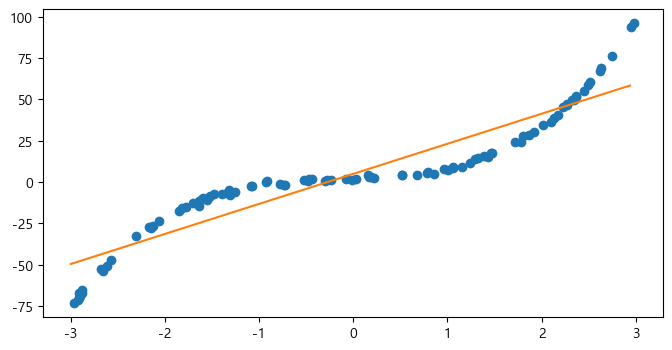

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# 학습 시 사용한 데이터는 3차항 데이터
plt.plot(X_train[:,0], y_train, 'o')

# 하지만 LinearRegression으로 fitting한 결과는 단순선형회귀이다. 따라서 직선의 형태로 나타난다.
plt.plot(X_test, lr.predict(X_test))

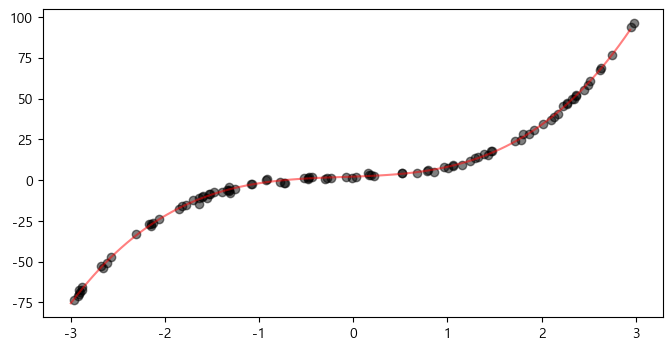

In [116]:
# 1.학습할 데이터 X_train을 3차 PolynomialFeature로 변환, X_train_poly로 변환.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polyfeat = PolynomialFeatures(degree=3, include_bias=True)
polyfeat.fit(X_train)
X_train_poly = polyfeat.transform(X_train)
X_test_poly = polyfeat.transform(X_test)

# 2.X_train 대신 X_train_poly를 학습시켜 3차 다항회귀 모델을 적합한다.
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 3. X_test를 2의 모델에 적용하여 예측값 y_pred를 구한다.

# [Plotting] 
#   검은색 dot로 X_train과 y_train을 plotting
plt.plot(X_train, y_train, 'o', c='black', alpha=0.5, linewidth=1)
#   붉은색 dot로 X_test과 y_pred을 plotting
plt.plot(X_test, lr.predict(X_test_poly),  c='red', alpha=0.5)

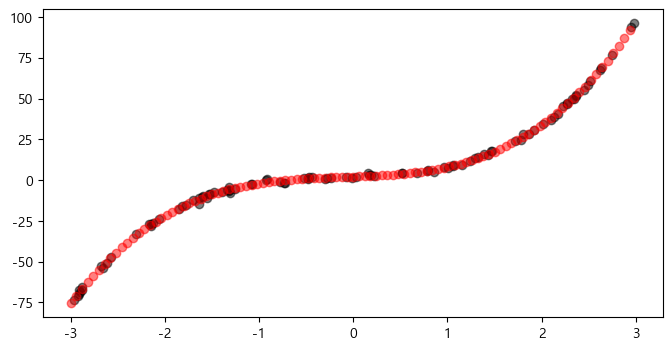

In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

plt.scatter(X_train, y_train, c='black', alpha=0.5)
plt.scatter(X_test, y_pred, c='red', alpha=0.5)

3. ANOVA분석 (9점)<br>
변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>


## 3. ANOVA분석 (9점)<br>
변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>

분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 
<br> 
